# Spearman correlation between spectral envelope and pitch

- for speech and non-speech fragments
- for noisy fragments in mixed and isolated soundtracks

In [2]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel, pearsonr, spearmanr
from utils import load_fragment_times, load_noisy_fragment_times

%matplotlib inline

In [5]:
hdir = '..'
speech = load_fragment_times(hdir, 'speech')
nonspeech = load_fragment_times(hdir, 'nonspeech')
aud = np.load('../data/audio_envelope_100Hz.npy')
pitch = np.loadtxt('../data/M3_audio_mono_down_pitch_short_edited')

noisy = load_noisy_fragment_times(hdir)
isolated = np.load('../data/audio_envelope_100Hz_clean.npy')

In [6]:
r_spe, r_non = [], []
for spe_frag, non_frag in zip(speech, nonspeech):
    r_spe.append(spearmanr(aud[spe_frag[0]:spe_frag[1]], pitch[spe_frag[0]:spe_frag[1]])[0])
    r_non.append(spearmanr(aud[non_frag[0]:non_frag[1]], pitch[non_frag[0]:non_frag[1]])[0])

/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [13]:
r_iso, r_mix = [], []
for noisy_frag in noisy:
    r_iso.append(spearmanr(isolated[noisy_frag[0]:noisy_frag[1]], pitch[noisy_frag[0]:noisy_frag[1]])[0])
    r_mix.append(spearmanr(aud[noisy_frag[0]:noisy_frag[1]], pitch[noisy_frag[0]:noisy_frag[1]])[0])

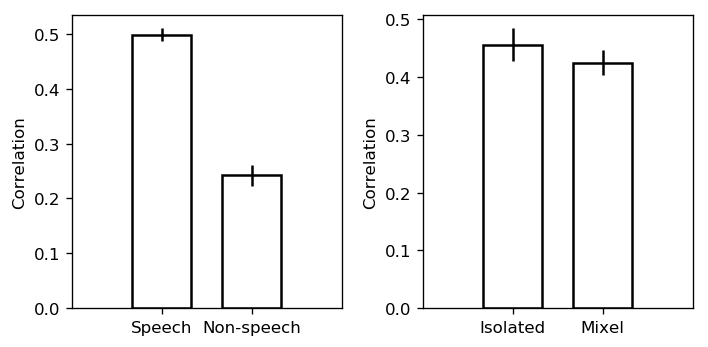

In [14]:
plt.figure(figsize=(6, 3), dpi=120)
plt.subplot(121)
plt.bar([.5, 1], [np.mean(r_spe), np.nanmean(r_non)], width=.33, facecolor='w', edgecolor='k', linewidth=1.5)
plt.errorbar([.5, 1], [np.mean(r_spe), np.nanmean(r_non)], yerr=[np.std(r_spe)/
                    np.sqrt(speech.shape[0]), np.nanstd(r_non)/np.sqrt(speech.shape[0])], linestyle='none', color='k')
plt.xlim(0, 1.5)
plt.ylabel('Correlation')
plt.xticks([.5, 1], ['Speech', 'Non-speech'])

plt.subplot(122)
plt.bar([.5, 1], [np.mean(r_iso), np.mean(r_mix)], width=.33, facecolor='w', edgecolor='k', linewidth=1.5)
plt.errorbar([.5, 1], [np.mean(r_iso), np.mean(r_mix)], yerr=[np.std(r_iso)/
                    np.sqrt(noisy.shape[0]), np.std(r_mix)/np.sqrt(noisy.shape[0])], linestyle='none', color='k')
plt.xlim(0, 1.5)
plt.xticks([.5, 1], ['Isolated', 'Mixel'])
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

In [11]:
## ttest for correlation pitch/spectral envelope in speech and nonspeech fragments
print(ttest_ind(np.arctanh(np.array(r_spe)), np.arctanh(np.array(r_non)[~np.isnan(r_non)])))

Ttest_indResult(statistic=10.951937481343345, pvalue=2.83596740652991e-22)


In [15]:
## ttest for correlation pitch/spectral envelope in noisy fragments of isolated and mixed tracks
print(ttest_rel(np.arctanh(np.array(r_iso)), np.arctanh(np.array(r_mix))))

Ttest_relResult(statistic=2.3565186196581633, pvalue=0.021621399320052616)
